In [2]:
# work with jl2815 environment
import xarray as xr # for netCDF4 
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from matplotlib import pyplot as plt
import os
# Ignore warnings due to duplicated dimension names
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="xarray")
from pathlib import Path

import sys
gems_tco_path = "/Users/joonwonlee/Documents/GEMS_TCO-1/src"
sys.path.append(gems_tco_path)

from GEMS_TCO import configuration as config
from GEMS_TCO import data_preprocess as dmbh

In [3]:
# file_path = "/Volumes/Backup Plus/GEMS_UNZIPPED/2024070131/20240701_0045.nc"  # portable device
file_path = "/Users/joonwonlee/Documents/GEMS_DATA/2024070131/20240701_0045.nc" # mac
location = xr.open_dataset(file_path, group='Geolocation Fields')
Z = xr.open_dataset(file_path, group='Data Fields')

import netCDF4 as nc

dataset = nc.Dataset(file_path)

# Print all group names
print("Groups in the NetCDF file:")
for group_name in dataset.groups:
    print(group_name)

# Optionally, print variables in each group
for group_name, group in dataset.groups.items():
    print(f"\nVariables in group '{group_name}':")
    for var_name in group.variables:
        print(var_name)

# Close the dataset
dataset.close()

Groups in the NetCDF file:
Data Fields
Geolocation Fields
METADATA

Variables in group 'Data Fields':
AveragingKernel
CloudPressure
ColumnAmountO3
DegreesOfFreedomForSignal
EstimatedError
FinalAlgorithmFlags
LayerEfficiency
Nvalue
O3BelowCloud
Reflectivity340
Reflectivity380
Residue
StepOneO3
StepTwoO3
TerrainPressure
dNdR
dR_dl
EffectiveCloudFraction

Variables in group 'Geolocation Fields':
Latitude
Longitude
RelativeAzimuthAngle
SolarZenithAngle
ViewingZenithAngle
Time
GroundPixelQualityFlags

Variables in group 'METADATA':


In [4]:
computer_path = config.mac_data_load_path  # mac
print(computer_path)

# portable_disk = "/Volumes/Backup Plus/GEMS_UNZIPPED/" 
year = 2024
month = 7
filelist_instance = dmbh.file_path_list(year, month, computer_path)
# filelist_instance = file_path_list(year, month, portable_disk)
file_paths_list = filelist_instance.file_names_july24() 


# [중요] 아래 좌표 설정이 충돌로 인해 여러 개가 겹쳐 있었습니다.
# 원하시는 범위를 주석 해제하여 사용하세요.

# Case 1: Broad area
instance = dmbh.MonthAggregatedCSV(-5, 7, 118, 135)

# Case 2: Specific area (코드 상 가장 많이 중복된 것으로 보아 이것일 확률이 높음)
#instance = dmbh.MonthAggregatedCSV(0, 5, 123, 133)

GoodQualityData = instance.aggregate_july24tocsv(file_paths_list)

/Users/joonwonlee/Documents/GEMS_DATA/


130065.63306451614


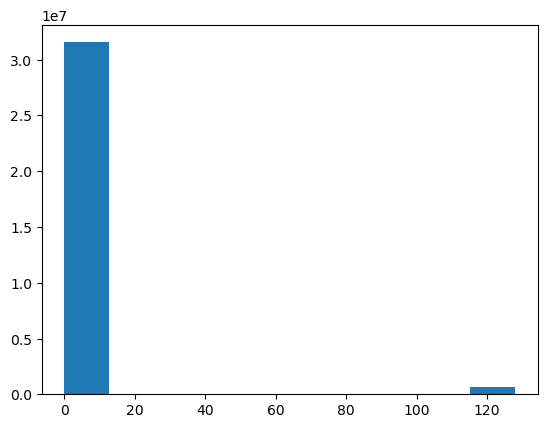

In [5]:
# Check shape ratio
print(GoodQualityData.shape[0]/31/8)
# 5 10 123 133  33856 without filtering 0 only: 10759  fine list: 32063 
# 0 5 123 133 00 only  13520  33092 if 0|2|4|128

plt.hist(GoodQualityData['FinalAlgorithmFlags'])
plt.show()

In [6]:
instance.save(GoodQualityData, 2024, 7, computer_path)

loop

In [ ]:
year = 2024
portable_disk = "/Volumes/Backup Plus/GEMS_UNZIPPED/" 

for month in range(7, 8):  # From July to August (Targeting July)
    # filelist_instance = file_path_list(year, month, computer_path)

    # truncate data and save in cvs
    filelist_instance = dmbh.file_path_list(year, month, portable_disk)
    file_paths_list = filelist_instance.file_names_july24() 

    # transform ORI dense data into pickle file
    
    # [좌표 설정 충돌 부분 확인 필요]
    
    instance = dmbh.MonthAggregatedCSV(-5, 7, 118, 135)
    #instance = dmbh.MonthAggregatedCSV(0, 5, 123, 133)

    GoodQualityData = instance.aggregate_july24tocsv(file_paths_list)
    instance.save(GoodQualityData, year, month, computer_path)

In [7]:
# input_base = "/Volumes/Backup Plus/Extracted_data/"       MAC: working from portable disk requires permission, figure out later
mac_data_path = config.mac_data_load_path   # "C:\\Users\\joonw\\TCO\\GEMS_data"    MSI notebook

# [좌표 설정 충돌 부분 확인 필요]
lat_start, lat_end, lon_start, lon_end = -5, 7, 118, 135
#lat_start, lat_end, lon_start, lon_end = 0, 5, 123, 133

years = [2024]  # years = [2023,2024]
months = list(range(7, 8))

instance = dmbh.MonthAggregatedHashmap(lat_start, lat_end, lon_start, lon_end, years, months)
instance.aggregate_july24topickle(csvfilepath=mac_data_path)

Reading file: /Users/joonwonlee/Documents/GEMS_DATA/data_2024/data_24_07_0131_N-57_E118135.csv
Successfully processed and saved data for year 24 month 07.
